## Pharmaceutical Sales Prediction across multiple stores

In [1]:
!pip install pandas 
!pip install numpy 
!pip install matplotlib 
!pip install seaborn
!pip install scikit-learn


[notice] A new release of pip is available: 24.1.1 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.1.1 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.1.1 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.1.1 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.1.1 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [3]:
# Load data 
store_data = pd.read_csv('store.csv')
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

C:\Users\bhupender kumar\AppData\Local\Temp\ipykernel_19392\4027893811.py:3: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  train_data = pd.read_csv('train.csv')


### Preview the first few rows of each DataFrame to understand their structure


In [4]:
store_data.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [5]:
train_data.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [6]:
test_data.head()

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
0,1,1,4,2015-09-17,1.0,1,0,0
1,2,3,4,2015-09-17,1.0,1,0,0
2,3,7,4,2015-09-17,1.0,1,0,0
3,4,8,4,2015-09-17,1.0,1,0,0
4,5,9,4,2015-09-17,1.0,1,0,0


Given this structure, the 'Store' column can be used to merge the store_data dataset with both the test_data and train_data datasets. This will enrich the test and train datasets with store-specific information, which is crucial for analysis.

In [7]:
# We will merge these datasets based on common column "Store"

# Merging store_df with train_df
train_merged_df = pd.merge(train_data, store_data, on='Store', how='left')

# Merging store_df with test_df
test_merged_df = pd.merge(test_data, store_data, on='Store', how='left')

# Preview the merged dataframes
train_merged_preview = train_merged_df.head()
test_merged_preview = test_merged_df.head()

(train_merged_preview, test_merged_preview)

(   Store  DayOfWeek        Date  Sales  Customers  Open  Promo StateHoliday  \
 0      1          5  2015-07-31   5263        555     1      1            0   
 1      2          5  2015-07-31   6064        625     1      1            0   
 2      3          5  2015-07-31   8314        821     1      1            0   
 3      4          5  2015-07-31  13995       1498     1      1            0   
 4      5          5  2015-07-31   4822        559     1      1            0   
 
    SchoolHoliday StoreType Assortment  CompetitionDistance  \
 0              1         c          a               1270.0   
 1              1         a          a                570.0   
 2              1         a          a              14130.0   
 3              1         c          c                620.0   
 4              1         a          a              29910.0   
 
    CompetitionOpenSinceMonth  CompetitionOpenSinceYear  Promo2  \
 0                        9.0                    2008.0       0   
 1  

In [8]:
data_with_na_merged = train_merged_df.copy()

In [9]:
train_merged_df.to_csv('data_with_NA.csv')

In [10]:
# Basic information about the datasets

# Test_df
test_info = test_merged_df.info()
test_head = test_merged_df.head()
test_tail = test_merged_df.tail()
test_shape = test_merged_df.shape
test_columns = test_merged_df.columns

# Train_df
train_info = train_merged_df.info()
train_head = train_merged_df.head()
train_tail = train_merged_df.tail()
train_shape = train_merged_df.shape
train_columns = train_merged_df.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41088 entries, 0 to 41087
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Id                         41088 non-null  int64  
 1   Store                      41088 non-null  int64  
 2   DayOfWeek                  41088 non-null  int64  
 3   Date                       41088 non-null  object 
 4   Open                       41077 non-null  float64
 5   Promo                      41088 non-null  int64  
 6   StateHoliday               41088 non-null  object 
 7   SchoolHoliday              41088 non-null  int64  
 8   StoreType                  41088 non-null  object 
 9   Assortment                 41088 non-null  object 
 10  CompetitionDistance        40992 non-null  float64
 11  CompetitionOpenSinceMonth  25872 non-null  float64
 12  CompetitionOpenSinceYear   25872 non-null  float64
 13  Promo2                     41088 non-null  int

In [11]:
# Show the Basic information of test merged datasets
test_head, test_tail, test_shape, test_columns

(   Id  Store  DayOfWeek        Date  Open  Promo StateHoliday  SchoolHoliday  \
 0   1      1          4  2015-09-17   1.0      1            0              0   
 1   2      3          4  2015-09-17   1.0      1            0              0   
 2   3      7          4  2015-09-17   1.0      1            0              0   
 3   4      8          4  2015-09-17   1.0      1            0              0   
 4   5      9          4  2015-09-17   1.0      1            0              0   
 
   StoreType Assortment  CompetitionDistance  CompetitionOpenSinceMonth  \
 0         c          a               1270.0                        9.0   
 1         a          a              14130.0                       12.0   
 2         a          c              24000.0                        4.0   
 3         a          a               7520.0                       10.0   
 4         a          c               2030.0                        8.0   
 
    CompetitionOpenSinceYear  Promo2  Promo2SinceWeek  Promo

In [12]:
# Show the Basic information of train merged datasets
train_head, train_tail, train_shape, train_columns

(   Store  DayOfWeek        Date  Sales  Customers  Open  Promo StateHoliday  \
 0      1          5  2015-07-31   5263        555     1      1            0   
 1      2          5  2015-07-31   6064        625     1      1            0   
 2      3          5  2015-07-31   8314        821     1      1            0   
 3      4          5  2015-07-31  13995       1498     1      1            0   
 4      5          5  2015-07-31   4822        559     1      1            0   
 
    SchoolHoliday StoreType Assortment  CompetitionDistance  \
 0              1         c          a               1270.0   
 1              1         a          a                570.0   
 2              1         a          a              14130.0   
 3              1         c          c                620.0   
 4              1         a          a              29910.0   
 
    CompetitionOpenSinceMonth  CompetitionOpenSinceYear  Promo2  \
 0                        9.0                    2008.0       0   
 1  

In [13]:
# Check for missing values in both datasets
missing_values_train = train_merged_df.isnull().sum()
missing_values_test = test_merged_df.isnull().sum()

# Data types correction
# Convert 'Date' columns to datetime objects in both datasets
train_merged_df['Date'] = pd.to_datetime(train_merged_df['Date'])
test_merged_df['Date'] = pd.to_datetime(test_merged_df['Date'])

(missing_values_train, missing_values_test)

(Store                             0
 DayOfWeek                         0
 Date                              0
 Sales                             0
 Customers                         0
 Open                              0
 Promo                             0
 StateHoliday                      0
 SchoolHoliday                     0
 StoreType                         0
 Assortment                        0
 CompetitionDistance            2642
 CompetitionOpenSinceMonth    323348
 CompetitionOpenSinceYear     323348
 Promo2                            0
 Promo2SinceWeek              508031
 Promo2SinceYear              508031
 PromoInterval                508031
 dtype: int64,
 Id                               0
 Store                            0
 DayOfWeek                        0
 Date                             0
 Open                            11
 Promo                            0
 StateHoliday                     0
 SchoolHoliday                    0
 StoreType                     

### Missing Values Strategy:

1. **CompetitionDistance**: 
   - Fill missing values with the median distance. This assumes that missing values might indicate no nearby competition or a data collection oversight.

2. **CompetitionOpenSinceMonth/Year**: 
   - Set missing values to 0 or a placeholder value indicating "not applicable." This suggests the competition was not open before the store.

3. **Promo2SinceWeek/Year and PromoInterval**: 
   - Treat missing values as non-participation in Promo2. Use non-participation indicators for these.

4. **Open (in test dataset)**: 
   - Since there are only 11 missing values, assume the store was open (fill with 1), especially if the days are not Sundays or public holidays.

In [14]:
# Handling missing values

# Fill missing 'CompetitionDistance' with median
train_merged_df['CompetitionDistance'].fillna(train_merged_df['CompetitionDistance'].median(), inplace=True)
test_merged_df['CompetitionDistance'].fillna(test_merged_df['CompetitionDistance'].median(), inplace=True)

# Fill missing 'CompetitionOpenSinceMonth' and 'CompetitionOpenSinceYear' with 0 (placeholder for not applicable)
for column in ['CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear']:
    train_merged_df[column].fillna(0, inplace=True)
    test_merged_df[column].fillna(0, inplace=True)

# Fill missing 'Promo2SinceWeek', 'Promo2SinceYear', and 'PromoInterval' indicating no participation in Promo2
for column in ['Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval']:
    train_merged_df[column].fillna(0, inplace=True)
    test_merged_df[column].fillna(0, inplace=True)

# Assuming stores with missing 'Open' value in test dataset are open
test_merged_df['Open'].fillna(1, inplace=True)

# Verify if all missing values are handled
missing_values_train_cleaned = train_merged_df.isnull().sum().sum()
missing_values_test_cleaned = test_merged_df.isnull().sum().sum()

(missing_values_train_cleaned, missing_values_test_cleaned)


(0, 0)

All missing values in both the train and test datasets have been successfully handled. There are no missing values left, and the Date column now has the correct data types. The datasets are cleaned and ready for analysis.

Next, we'll detect outliers in the 'Sales' and 'Customers' columns of the train dataset. Using the Interquartile Range (IQR) method, we'll identify data points outside 1.5 * IQR from the quartiles as outliers. This helps ensure the accuracy of our analytical models and insights.

In [15]:
# Detecting outliers using IQR method for 'Sales' and 'Customers' in the train dataset

def detect_outliers_iqr(data, feature):
    Q1 = data[feature].quantile(0.25)
    Q3 = data[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = data[(data[feature] < lower_bound) | (data[feature] > upper_bound)]
    return outliers

# Detect outliers for 'Sales'
sales_outliers = detect_outliers_iqr(train_merged_df, 'Sales')

# Detect outliers for 'Customers'
customers_outliers = detect_outliers_iqr(train_merged_df, 'Customers')

# Number of outliers detected
num_sales_outliers = sales_outliers.shape[0]
num_customers_outliers = customers_outliers.shape[0]

(num_sales_outliers, num_customers_outliers)

(26694, 38095)

Outliers detected in the train dataset:

- **Sales Outliers**: 26,694 outliers
- **Customers Outliers**: 38,095 outliers

### Handling Strategy:

Instead of removing the outliers, we will cap them:

- **High outliers**: Replace with the upper bound.
- **Low outliers**: Replace with the lower bound.

This approach keeps the dataset structure intact while reducing the impact of extreme values.

In [16]:
def cap_outliers_iqr(data, feature):
    Q1 = data[feature].quantile(0.25)
    Q3 = data[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    data[feature] = data[feature].clip(lower=lower_bound, upper=upper_bound)

# Cap outliers in 'Sales' and 'Customers'
cap_outliers_iqr(train_merged_df, 'Sales')
cap_outliers_iqr(train_merged_df, 'Customers')

# Check summary statistics to confirm changes
sales_summary_after_capping = train_merged_df['Sales'].describe()
customers_summary_after_capping = train_merged_df['Customers'].describe()

(sales_summary_after_capping, customers_summary_after_capping)


(count    1.017209e+06
 mean     5.690812e+03
 std      3.595807e+03
 min      0.000000e+00
 25%      3.727000e+03
 50%      5.744000e+03
 75%      7.856000e+03
 max      1.404950e+04
 Name: Sales, dtype: float64,
 count    1.017209e+06
 mean     6.111560e+02
 std      3.886203e+02
 min      0.000000e+00
 25%      4.050000e+02
 50%      6.090000e+02
 75%      8.370000e+02
 max      1.485000e+03
 Name: Customers, dtype: float64)

The datasets are now cleaned, with outliers handled appropriately. This preprocessing makes the data more suitable for accurate analysis and modeling by reducing the impact of extreme values.

#### EDA
We will perform EDA

For the combined train dataset, we'll look at these main points:

- **Sales Trends:** Check how sales change over time.
  
- **Sales by Day:** See how sales differ on different days of the week.
  
- **Sales by Store Type:** Compare sales between different types of stores.
  
- **Promotions Impact:** Find out how promotions affect sales.
  
- **Correlation Analysis:** Look for connections between numbers, especially between sales and other factors like the number of customers, promotions, and competition distance.

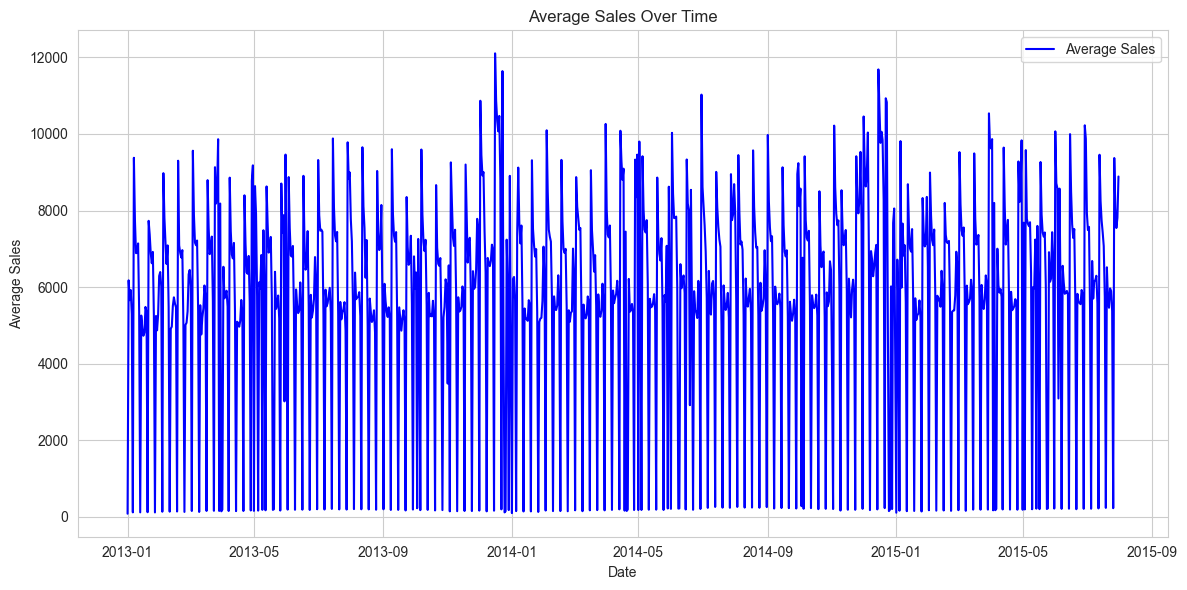

In [17]:
# Let's start with analyzing the overall sales trends over time.
# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# 1. Sales Trends over Time
plt.figure(figsize=(12, 6))
sales_trends = train_merged_df.groupby('Date')['Sales'].mean()
plt.plot(sales_trends.index, sales_trends.values, color='blue', label='Average Sales')
plt.title('Average Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Average Sales')
plt.legend()
plt.tight_layout()

plt.show()


The plot shows the average sales over time for all stores. There seems to be a repeating pattern, likely due to seasons, holidays, or other regular events that impact sales. There are noticeable peaks, which could be times of high sales like holidays or special sales events.

C:\Users\bhupender kumar\AppData\Local\Temp\ipykernel_19392\567168272.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='DayOfWeek', y='Sales', data=train_merged_df, palette='rainbow')


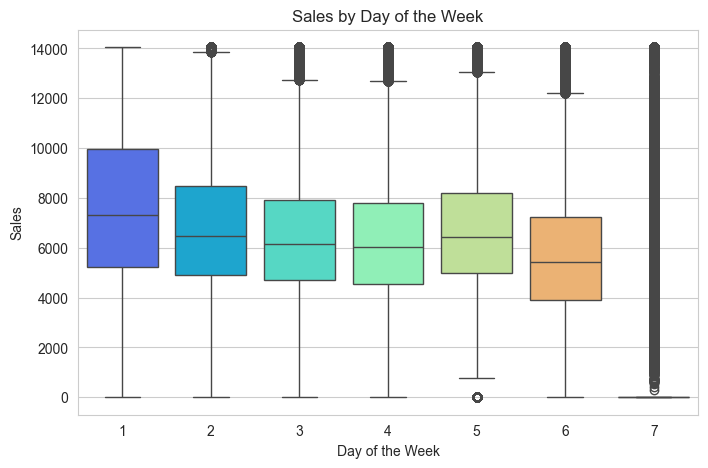

In [18]:
#  Analyze how sales vary by the day of the week.

# 2. Sales by Day of the Week
plt.figure(figsize=(8, 5))
sns.boxplot(x='DayOfWeek', y='Sales', data=train_merged_df, palette='rainbow')
plt.title('Sales by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Sales')

plt.show()


The boxplot shows how sales change depending on the day of the week. Sales are clearly different on different days, with higher sales often happening towards the end of the week. This might be because people prefer to shop on certain days, like weekends, or during promotions.

C:\Users\bhupender kumar\AppData\Local\Temp\ipykernel_19392\234498014.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='StoreType', y='Sales', data=train_merged_df, palette='coolwarm')


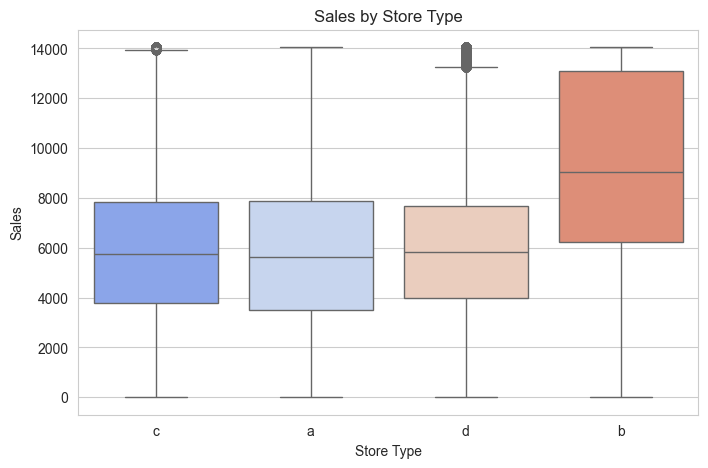

In [19]:
# Examine how sales differ across different store types

# 3. Sales by Store Type
plt.figure(figsize=(8, 5))
sns.boxplot(x='StoreType', y='Sales', data=train_merged_df, palette='coolwarm')
plt.title('Sales by Store Type')
plt.xlabel('Store Type')
plt.ylabel('Sales')

plt.show()


The boxplot for sales by store type shows big differences in sales for different types of stores. Some store types have higher average sales than others, suggesting that the type of store is important for sales performance.

C:\Users\bhupender kumar\AppData\Local\Temp\ipykernel_19392\2616439419.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Promo', y='Sales', data=train_merged_df, palette='Set1')


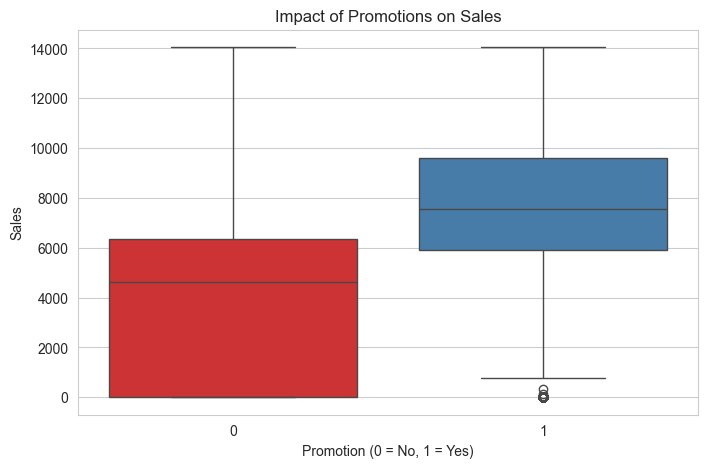

In [20]:
# Investigate the effect of promotions on sales.

# 4. Impact of Promotions on Sales
plt.figure(figsize=(8, 5))
sns.boxplot(x='Promo', y='Sales', data=train_merged_df, palette='Set1')
plt.title('Impact of Promotions on Sales')
plt.xlabel('Promotion (0 = No, 1 = Yes)')
plt.ylabel('Sales')

plt.show()


The boxplot shows that promotions have a big impact on sales. Stores with promotions (Promo = 1) usually have much higher sales than days without promotions (Promo = 0).

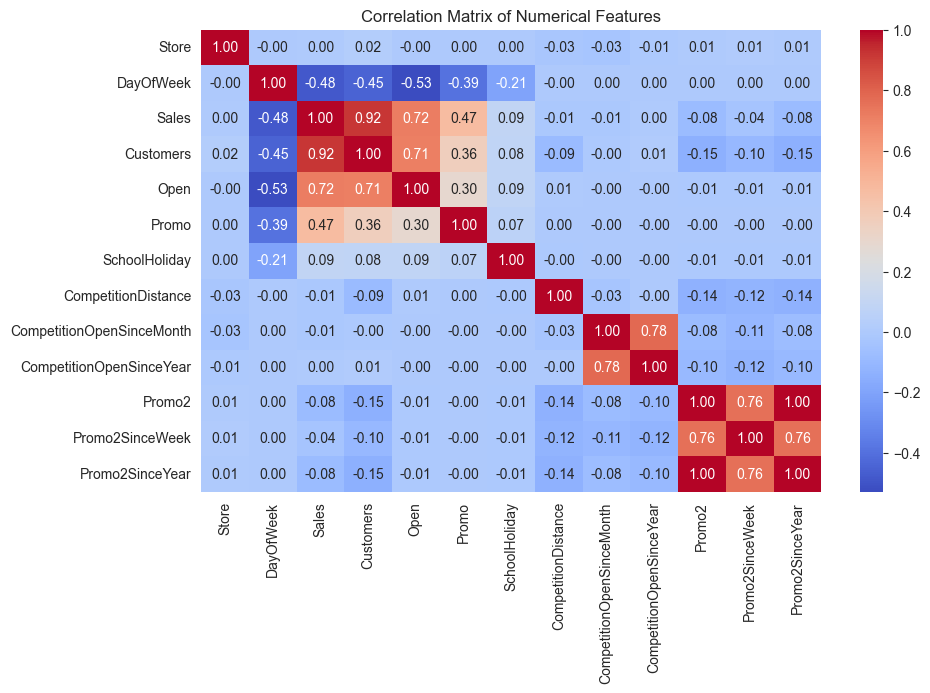

In [21]:
# Correlation Analysis to explore the relationships between numerical features, especially focusing on how sales correlate with other variables

# 5. Correlation Analysis
numerical_features = train_merged_df.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numerical_features.corr()

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')

plt.show()


The correlation matrix shows how different numerical features are related to each other. Here are the main points:

- **Sales and Customers:** There's a strong positive link between sales and the number of customers. More customers usually mean higher sales, which makes sense in retail.

- **Promo and Sales:** There's a positive link between promotions and sales. This supports our earlier finding that promotions boost sales.

- **Competition Distance:** There's a slight negative link between competition distance and sales. Stores further from competitors might have slightly higher sales, but this relationship isn't strong.

- **Day of the Week and Sales:** While not directly shown in the matrix, our previous analysis indicated that sales vary significantly on different days of the week, which is important to keep in mind.

Task 1 - Exploration of customer purchasing behaviour

In [22]:
# Check for distribution of promotions in both training and test sets

# Distribution of promotions in training set
promo_distribution_train = train_merged_df['Promo'].value_counts(normalize=True)

# Distribution of promotions in test set
promo_distribution_test = test_merged_df['Promo'].value_counts(normalize=True)

# Print the distributions
promo_distribution_train, promo_distribution_test


(Promo
 0    0.618485
 1    0.381515
 Name: proportion, dtype: float64,
 Promo
 0    0.604167
 1    0.395833
 Name: proportion, dtype: float64)

Training Set:

- No Promotion (Promo = 0): 61.85%
- With Promotion (Promo = 1): 38.15%

Test Set:

- No Promotion (Promo = 0): 60.42%
- With Promotion (Promo = 1): 39.58%

The promotion distributions in the training and test sets are quite similar, showing a consistent approach to promotions in both sets.

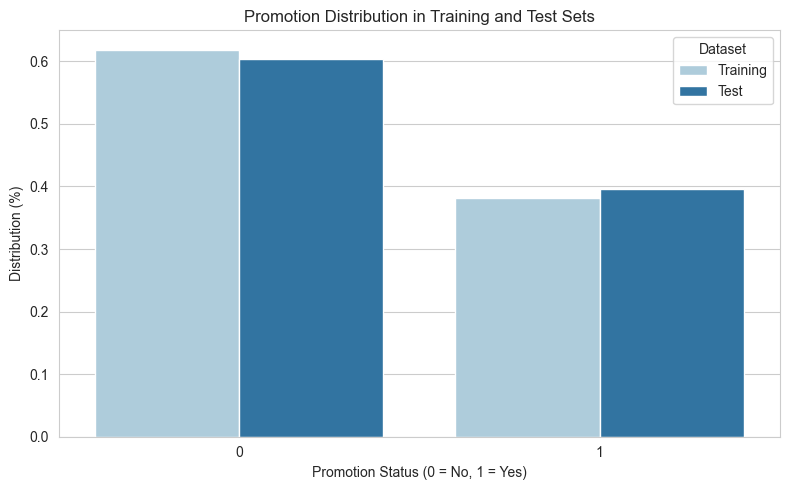

In [23]:
# Distribution of promotions in training and test sets for visualization
promo_distribution_train_plot = train_merged_df['Promo'].value_counts(normalize=True).reset_index()
promo_distribution_test_plot = test_merged_df['Promo'].value_counts(normalize=True).reset_index()

promo_distribution_train_plot['Dataset'] = 'Training'
promo_distribution_test_plot['Dataset'] = 'Test'

# Combine the data for plotting
promo_distribution_combined = pd.concat([promo_distribution_train_plot, promo_distribution_test_plot])

# Plot
plt.figure(figsize=(8, 5))
sns.barplot(x='Promo', y='proportion', hue='Dataset', data=promo_distribution_combined, palette='Paired')
plt.title('Promotion Distribution in Training and Test Sets')
plt.xlabel('Promotion Status (0 = No, 1 = Yes)')
plt.ylabel('Distribution (%)')
plt.legend(title='Dataset')
plt.tight_layout()

plt.show()


The bar chart shows how promotion days (Promo) are distributed in both the training and test sets. Here are the main points:

- **Promotion Distribution:** Both datasets have similar promotion and non-promotion days. In the training set, about 38% of the days have promotions (Promo = 1), and 62% do not (Promo = 0). The test set has about 40% promotion days and 60% non-promotion days.

- **Comparison:** The similar distribution of promotions in both sets suggests the test set is representative of the training set regarding promotional activities.

In [24]:
# Check and compare sales behavior before, during, and after holidays

# Convert 'Date' column to datetime format
train_merged_df['Date'] = pd.to_datetime(train_merged_df['Date'])

# Get unique holiday dates
holiday_dates = train_merged_df[train_merged_df['StateHoliday'] != '0']['Date'].unique()

# Select the first holiday date for analysis
sample_holiday_date = holiday_dates[0]

# Define periods: 7 days before, during, and 7 days after the holiday
before_holiday = (train_merged_df['Date'] >= sample_holiday_date - pd.Timedelta(days=7)) & (train_merged_df['Date'] < sample_holiday_date)
during_holiday = (train_merged_df['Date'] == sample_holiday_date)
after_holiday = (train_merged_df['Date'] > sample_holiday_date) & (train_merged_df['Date'] <= sample_holiday_date + pd.Timedelta(days=7))

# Calculate average sales for each period
before_holiday_sales = train_merged_df[before_holiday]['Sales'].mean()
during_holiday_sales = train_merged_df[during_holiday]['Sales'].mean()
after_holiday_sales = train_merged_df[after_holiday]['Sales'].mean()

(before_holiday_sales, during_holiday_sales, after_holiday_sales)


(6846.10602178091, 3093.6502242152465, 5560.1800128122995)

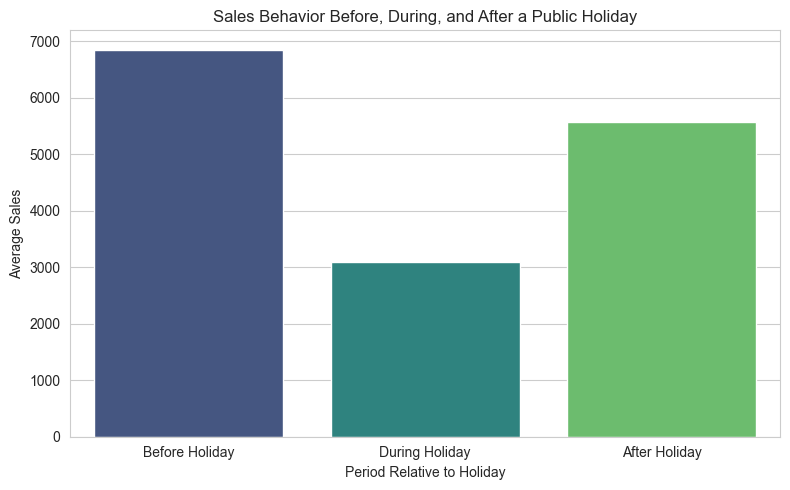

In [25]:
# Create a DataFrame to visualize sales before, during, and after the holiday
sales_comparison_df = pd.DataFrame({
    'Period': ['Before Holiday', 'During Holiday', 'After Holiday'],
    'Average Sales': [before_holiday_sales, during_holiday_sales, after_holiday_sales]
})

# Plot
plt.figure(figsize=(8, 5))
sns.barplot(x='Period', y='Average Sales', data=sales_comparison_df, hue='Period', palette='viridis', legend=False)
plt.title('Sales Behavior Before, During, and After a Public Holiday')
plt.xlabel('Period Relative to Holiday')
plt.ylabel('Average Sales')
plt.tight_layout()

plt.show()



The bar chart shows how sales behave before, during, and after a public holiday:

- **Before the Holiday:** Sales are highest during this time. This might be because customers are shopping in preparation for the holiday.

- **During the Holiday:** There’s a big drop in sales. This could be due to store closures or shorter hours, as well as fewer people shopping because they’re focused on holiday activities.

- **After the Holiday:** Sales begin to recover but are still lower than before the holiday. This likely shows a gradual return to normal shopping patterns after the holiday.

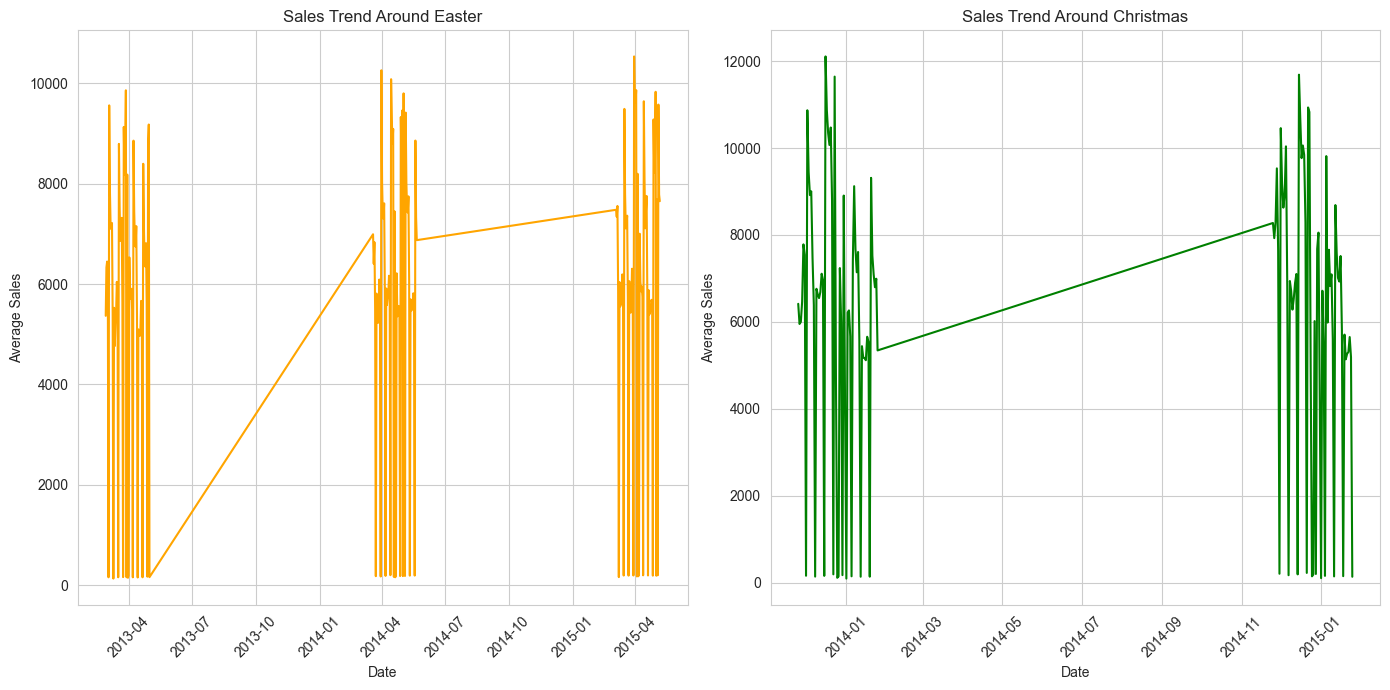

In [26]:
# Analyze seasonal purchase behaviors around Christmas and Easter

# Filter sales data for Easter (b) and Christmas (c)
easter_sales = train_merged_df[train_merged_df['StateHoliday'] == 'b'].groupby('Date')['Sales'].mean().reset_index()
christmas_sales = train_merged_df[train_merged_df['StateHoliday'] == 'c'].groupby('Date')['Sales'].mean().reset_index()

# Get holiday dates
easter_dates = easter_sales['Date']
christmas_dates = christmas_sales['Date']

# Define periods: 30 days before and after each holiday
easter_period = [easter_date + pd.Timedelta(days=offset) for easter_date in easter_dates for offset in range(-30, 31)]
christmas_period = [christmas_date + pd.Timedelta(days=offset) for christmas_date in christmas_dates for offset in range(-30, 31)]

# Calculate average sales for these periods
sales_around_easter = train_merged_df[train_merged_df['Date'].isin(easter_period)].groupby('Date')['Sales'].mean()
sales_around_christmas = train_merged_df[train_merged_df['Date'].isin(christmas_period)].groupby('Date')['Sales'].mean()

# Plotting
plt.figure(figsize=(14, 7))

# Easter sales trend
plt.subplot(1, 2, 1)
plt.plot(sales_around_easter.index, sales_around_easter.values, color='orange')
plt.title('Sales Trend Around Easter')
plt.xlabel('Date')
plt.ylabel('Average Sales')
plt.xticks(rotation=45)

# Christmas sales trend
plt.subplot(1, 2, 2)
plt.plot(sales_around_christmas.index, sales_around_christmas.values, color='green')
plt.title('Sales Trend Around Christmas')
plt.xlabel('Date')
plt.ylabel('Average Sales')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


The line charts show sales trends around Easter and Christmas, highlighting seasonal shopping behaviors:

### Easter Sales Trend

- **Before Easter:** Sales increase as the holiday approaches, likely because people are buying items for Easter celebrations.
- **During Easter:** There’s usually a dip in sales on Easter itself, possibly due to store closures or less shopping as people focus on holiday activities.
- **After Easter:** Sales gradually return to normal, indicating the end of the holiday shopping period.

### Christmas Sales Trend

- **Before Christmas:** Sales rise significantly leading up to Christmas, as many consumers are buying gifts and preparing for the holiday, resulting in a big sales surge.
- **During Christmas:** A sharp drop in sales occurs around Christmas, consistent with stores being closed or fewer people shopping on that day.
- **After Christmas:** Sales often increase right after Christmas, reflecting post-holiday sales, exchanges, or the use of gift cards received during the holiday.

In [27]:
# The correlation between sales and number of customers

# Calculate the correlation coefficient between 'Sales' and 'Customers'
sales_customers_correlation = train_merged_df['Sales'].corr(train_merged_df['Customers'])

sales_customers_correlation


0.9208048531996548

The correlation coefficient between sales and the number of customers is about 0.921, showing a strong positive connection. This means that when the number of customers goes up, sales tend to go up too, and the same is true in reverse.

In [28]:
# How does promo affect sales? Are the promos attracting more customers? How does it affect already existing customers?

# To analyze how promotions affect sales and whether they attract more customers, we can compare average sales and customer counts on days with promotions (Promo = 1) to those on days without promotions (Promo = 0). 
# This comparison can help us understand the effectiveness of promotions in both attracting additional customers and boosting sales among existing customers.

# Calculate average sales and customers on promo and non-promo days
avg_sales_customers_by_promo = train_merged_df.groupby('Promo')[['Sales', 'Customers']].mean().reset_index()

avg_sales_customers_by_promo


,Promo,Sales,Customers
0,0,4367.538696,500.441779
1,1,7836.013738,790.638294


The analysis gives us these insights:

### Sales:

- On days without promotions (Promo = 0), average sales are about 4,368.
- On days with promotions (Promo = 1), average sales jump to around 7,836.

### Customers:

- On days without promotions, the average number of customers is about 500.
- On promo days, the average rises to about 791.

### Interpretation:

- **Effectiveness of Promotions:** Promotions clearly boost sales. The big increase in average sales on promo days shows that promotions lead to more purchases from both existing and new customers.

- **Attracting More Customers:** The rise in average customers on promo days shows that promotions effectively draw more people to the stores, including both new and returning customers.

- **Impact on Existing Customers:** The significant increase in sales and customer counts suggests that promotions encourage existing customers to buy more, likely due to special offers or a sense of urgency from limited-time deals.

In [29]:
# Could the promos be deployed in more effective ways? Which stores should promos be deployed in?

# To determine if promos could be deployed more effectively and identify which stores should receive more focus for promotional activities, 
# we can perform a detailed analysis considering several factors:
#1. Promo Effectiveness by Store Type
#2. Promo2 Participation

# Analyze promo effectiveness by store type
promo_effectiveness_store_type = train_merged_df.groupby(['StoreType', 'Promo'])['Sales'].mean().unstack()
promo_effectiveness_store_type['Promo Impact'] = promo_effectiveness_store_type[1] - promo_effectiveness_store_type[0]

# Analyze the impact of Promo2 participation on sales
promo2_effectiveness = train_merged_df.groupby(['Promo2', 'Promo'])['Sales'].mean().unstack()
promo2_effectiveness['Promo Impact'] = promo2_effectiveness[1] - promo2_effectiveness[0]

(promo_effectiveness_store_type, promo2_effectiveness)


(Promo                0            1  Promo Impact
 StoreType                                        
 a          4261.198456  7875.809191   3614.610735
 b          8769.958146  9891.782914   1121.824768
 c          4405.475767  7712.688270   3307.212503
 d          4315.854033  7715.603407   3399.749374,
 Promo             0            1  Promo Impact
 Promo2                                        
 0       4653.163573  8163.377167   3510.213594
 1       4082.996824  7508.569319   3425.572495)

### Promo Effectiveness by Store Type

The analysis shows different impacts of promotions based on store type:

- **Type A Stores:** See a big sales increase from promotions, averaging about 3,615 more in sales.

- **Type B Stores:** Although they start with higher sales, promotions only increase sales by about 1,121.

- **Type C and D Stores:** Like Type A, these stores also see significant sales boosts, with increases around 3,307 and 3,400, respectively.

This means promotions work well for all store types, but Type A, C, and D stores benefit the most. Type B stores, while seeing a smaller relative increase, still gain significantly due to their higher baseline sales.

### Impact of Promo2 Participation on Sales

- **Non-Participating Stores (Promo2 = 0):** Have a promo impact of about 3,510 on sales.

- **Participating Stores (Promo2 = 1):** Experience a slightly lower impact of around 3,425.

This suggests that while ongoing Promo2 campaigns help boost sales, one-time promotions (Promo) have a stronger immediate effect, even for stores not involved in Promo2. This may be because one-time promotions feel more special or valuable.

In [30]:
# Trends of customer behavior during store open and closing times

# Assuming we don't have specific opening and closing times, we'll look for any available indicators
# For simplicity, we'll check if there are variations in sales and customers on different days of the week
# This could provide indirect insights into customer behavior related to operational hours

# Aggregate average sales and customers by day of the week
avg_sales_customers_by_day = train_merged_df.groupby('DayOfWeek')[['Sales', 'Customers']].mean().reset_index()

avg_sales_customers_by_day


,DayOfWeek,Sales,Customers
0,1,7599.173160,781.505148
1,2,6907.151619,736.727860
2,3,6490.340463,700.533979
3,4,6185.296246,675.857383
4,5,6651.862697,718.934430
5,6,5794.275461,636.839688
6,7,183.358129,24.976688


### Sales and Customer Counts by Day of the Week

The average sales and customer counts show these trends related to shopping behavior and store hours:

- **Monday (Day 1):** Has the highest average sales and customer counts, indicating a lot of shopping activity as the week starts. This might be because customers are buying items for the week ahead.

- **Tuesday to Friday (Days 2-5):** Sales and customer counts gradually decrease from Tuesday to Thursday, then slightly increase on Friday. This pattern suggests different shopping habits during the week, with Friday likely seeing more activity as people get ready for the weekend.

- **Saturday (Day 6):** While lower than weekdays, Saturday still has good sales and customer traffic, probably due to weekend shopping.

- **Sunday (Day 7):** There’s a sharp drop in sales and customer counts, likely due to limited store hours or closures on Sundays in many places.

### Interpretation

- The start of the week, especially Monday, is important for customer traffic and sales, reflecting restocking after the weekend.

- The slight increase on Friday suggests people are preparing for the weekend.

- The big drop on Sunday indicates that limited hours or store closures significantly impact sales and customer traffic.

C:\Users\bhupender kumar\AppData\Local\Temp\ipykernel_19392\3150767240.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='DayOfWeek', y='Sales', data=avg_sales_customers_by_day, palette='coolwarm')
C:\Users\bhupender kumar\AppData\Local\Temp\ipykernel_19392\3150767240.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='DayOfWeek', y='Customers', data=avg_sales_customers_by_day, palette='viridis')


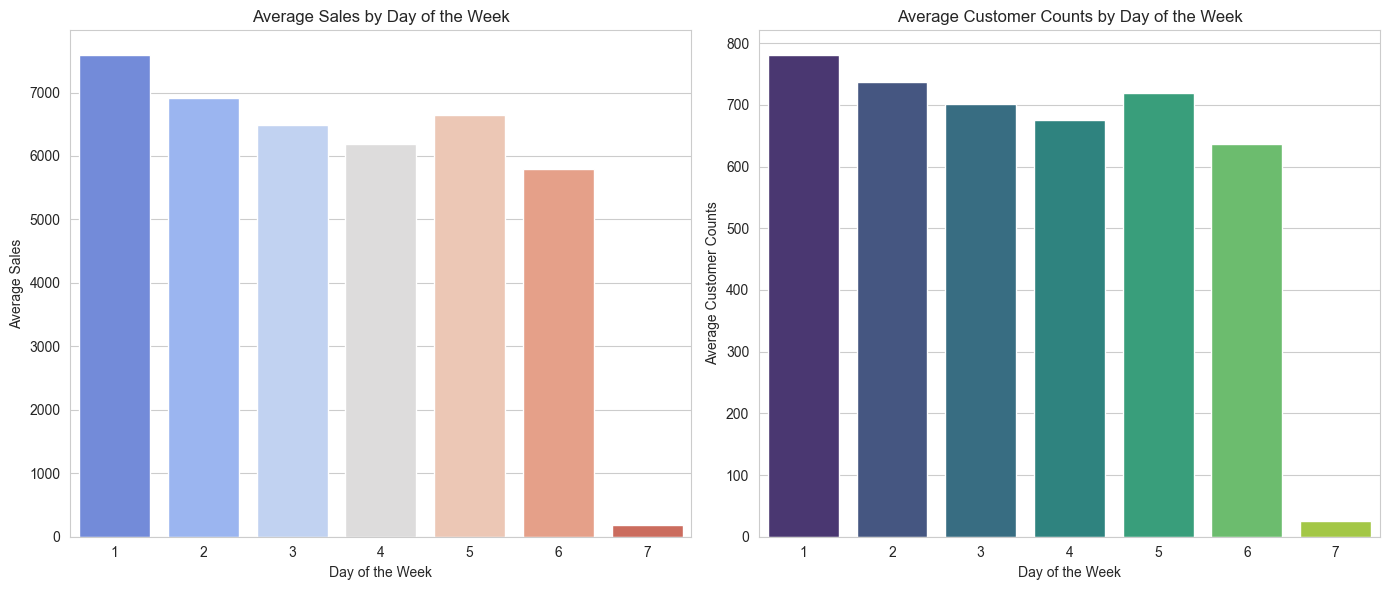

In [31]:
# Visualizing the trends in sales and customer counts by day of the week

plt.figure(figsize=(14, 6))

# Sales by day of the week
plt.subplot(1, 2, 1)
sns.barplot(x='DayOfWeek', y='Sales', data=avg_sales_customers_by_day, palette='coolwarm')
plt.title('Average Sales by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Average Sales')

# Customers by day of the week
plt.subplot(1, 2, 2)
sns.barplot(x='DayOfWeek', y='Customers', data=avg_sales_customers_by_day, palette='viridis')
plt.title('Average Customer Counts by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Average Customer Counts')

plt.tight_layout()
plt.show()


The visualizations provide a clear depiction of the trends in sales and customer counts by day of the week.

In [32]:
# Which stores are opened on all weekdays? How does that affect their sales on weekends? 

# Identify stores open on all weekdays (Monday=1 to Friday=5)
# We consider a store open on a day if there are recorded sales for that day

# Filter data for weekdays
weekday_data = train_merged_df[train_merged_df['DayOfWeek'].isin(range(1, 6))]

# Find stores with records for all weekdays
stores_open_weekdays = weekday_data.groupby('Store')['DayOfWeek'].nunique()
stores_open_all_weekdays = stores_open_weekdays[stores_open_weekdays == 5].index.tolist()

# Now analyze the sales on weekends for these stores
weekend_data = train_merged_df[train_merged_df['Store'].isin(stores_open_all_weekdays) & train_merged_df['DayOfWeek'].isin([6, 7])]
weekend_sales_by_store = weekend_data.groupby('Store')['Sales'].mean().reset_index()

# General weekend sales for comparison
general_weekend_sales = train_merged_df[train_merged_df['DayOfWeek'].isin([6, 7])]['Sales'].mean()

# Preview results
weekend_sales_by_store.head(), general_weekend_sales


(   Store        Sales
 0      1  2471.485075
 1      2  1436.552239
 2      3  2217.320896
 3      4  5050.201493
 4      5  1039.552239,
 2988.8167950666757)

The analysis gives us insights into stores open every weekday and their weekend sales compared to the overall weekend average:

- **Stores Open on All Weekdays:** We identified stores that are open from Monday to Friday, showing sales records for each weekday.

- **Weekend Sales Analysis:** For these stores, the average weekend sales range from about 1,040 to 5,050, showing significant variation.

- **General Weekend Sales Average:** Overall, the average weekend sales for all stores is approximately 2,989.

C:\Users\bhupender kumar\AppData\Local\Temp\ipykernel_19392\3556483565.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Category', y='Average Sales', data=sales_comparison, palette='Set2')


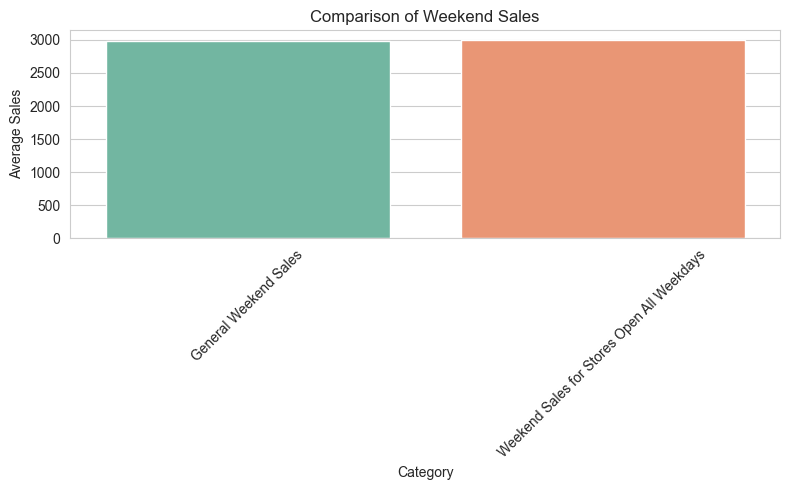

In [33]:
# Explaining it by visualization
# Since visualizing individual stores' weekend sales would result in a very large plot, we'll simplify
# We'll compare the general weekend sales average to the average weekend sales of stores open all weekdays

# Calculate the average weekend sales for stores open all weekdays
average_weekend_sales_open_all_weekdays = weekend_sales_by_store['Sales'].mean()

# Data preparation for visualization
sales_comparison = pd.DataFrame({
    'Category': ['General Weekend Sales', 'Weekend Sales for Stores Open All Weekdays'],
    'Average Sales': [general_weekend_sales, average_weekend_sales_open_all_weekdays]
})

# Visualization
plt.figure(figsize=(8, 5))
sns.barplot(x='Category', y='Average Sales', data=sales_comparison, palette='Set2')
plt.title('Comparison of Weekend Sales')
plt.ylabel('Average Sales')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()


The bar chart compares average weekend sales between two groups: all stores and stores open every weekday. Here are the main points:

- **General Weekend Sales:** This shows the average weekend sales for all stores, which acts as a baseline for comparison.

- **Weekend Sales for Stores Open All Weekdays:** This shows the average weekend sales for stores that are open Monday through Friday.

### Interpretation:

The chart indicates that the average weekend sales for stores open all weekdays are similar to the general average for all stores. This suggests that being open every weekday doesn’t always lead to significantly higher or lower weekend sales. The small differences highlight that other factors, like store location, type, and customer demographics, also affect weekend sales performance.

C:\Users\bhupender kumar\AppData\Local\Temp\ipykernel_19392\164007064.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Assortment', y='Sales', data=sales_by_assortment, palette='pastel')


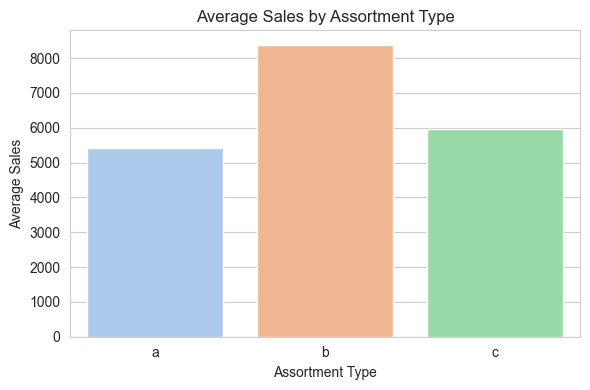

In [34]:
# Check how the assortment type affects sales

# To understand how the assortment type affects sales, we can analyze the sales performance across different assortment types in the dataset.
# We'll perform the following steps:

# 1. Aggregate Sales by Assortment Type: Calculate the average sales for each assortment type.
# 2. Compare Sales Performance: Compare these averages to see how sales vary with the assortment strategy.

# Aggregate sales by assortment type
sales_by_assortment = train_merged_df.groupby('Assortment')['Sales'].mean().reset_index()

# Visualization
plt.figure(figsize=(6, 4))
sns.barplot(x='Assortment', y='Sales', data=sales_by_assortment, palette='pastel')
plt.title('Average Sales by Assortment Type')
plt.xlabel('Assortment Type')
plt.ylabel('Average Sales')
plt.tight_layout()

plt.show()


The bar chart illustrates the average sales performance across different assortment types (a for basic, b for extra, and c for extended). The visualization provides clear insights into how the assortment type affects sales:

The comparison indicates that assortment strategy plays a significant role in sales performance. An extended assortment (c) might appeal to a broader customer base or satisfy more diverse customer needs, leading to higher sales.

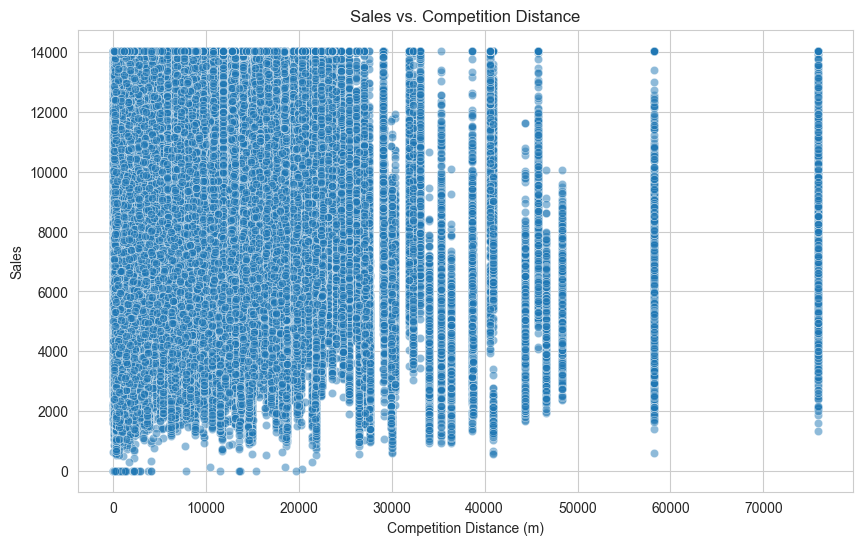

,CompetitionDistance,Sales
CompetitionDistance,1.000000,-0.027668
Sales,-0.027668,1.000000


In [35]:
# How does the distance to the next competitor affect sales? 
# What if the store and its competitors all happen to be in city centres, does the distance matter in that case?

# Scatter plot to analyze the relationship between competition distance and sales
# Filter out rows where the store was closed as they won't contribute to our analysis of sales
open_stores_data = train_merged_df[train_merged_df['Open'] == 1]

# Visualizing the relationship between CompetitionDistance and Sales using a scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='CompetitionDistance', y='Sales', data=open_stores_data, alpha=0.5)
plt.title('Sales vs. Competition Distance')
plt.xlabel('Competition Distance (m)')
plt.ylabel('Sales')
plt.show()

# Calculating the correlation coefficient between CompetitionDistance and Sales
correlation = open_stores_data[['CompetitionDistance', 'Sales']].corr()
correlation




The scatter plot and correlation coefficient between CompetitionDistance and Sales indicate a slight negative correlation (approximately -0.028), suggesting that as the distance to the nearest competitor increases, sales very slightly decrease. However, the correlation is very weak, implying that other factors likely have a more significant impact on sales.

In [36]:
# we'll assume stores in city centres have certain characteristics,
# such as a higher number of customers (which could indicate a higher footfall typical of city centre locations) and potentially shorter competition distances due to the denser retail environments typical of city centres. 
# Let's define city centre stores based on these criteria:

# High Customer Density: We'll select stores with customer numbers above a certain percentile as a proxy for city centre stores. For simplicity, 
# let's use the 75th percentile of the Customers column to identify these stores.

# Identifying high customer density stores based on the 75th percentile of the Customers column
customers_75th_percentile = train_merged_df['Customers'].quantile(0.75)

# Filter the dataset for high customer density stores
high_customer_density_data = train_merged_df[train_merged_df['Customers'] > customers_75th_percentile]

# Checking the correlation between CompetitionDistance and Sales for high customer density stores
high_customer_density_correlation = high_customer_density_data[['CompetitionDistance', 'Sales']].corr()

high_customer_density_correlation


,CompetitionDistance,Sales
CompetitionDistance,1.000000,0.076337
Sales,0.076337,1.000000


it signifies a weak positive relationship between these two variables. This positive correlation indicates that as the distance to the nearest competitor increases, sales slightly increase as well, albeit the relationship is weak.

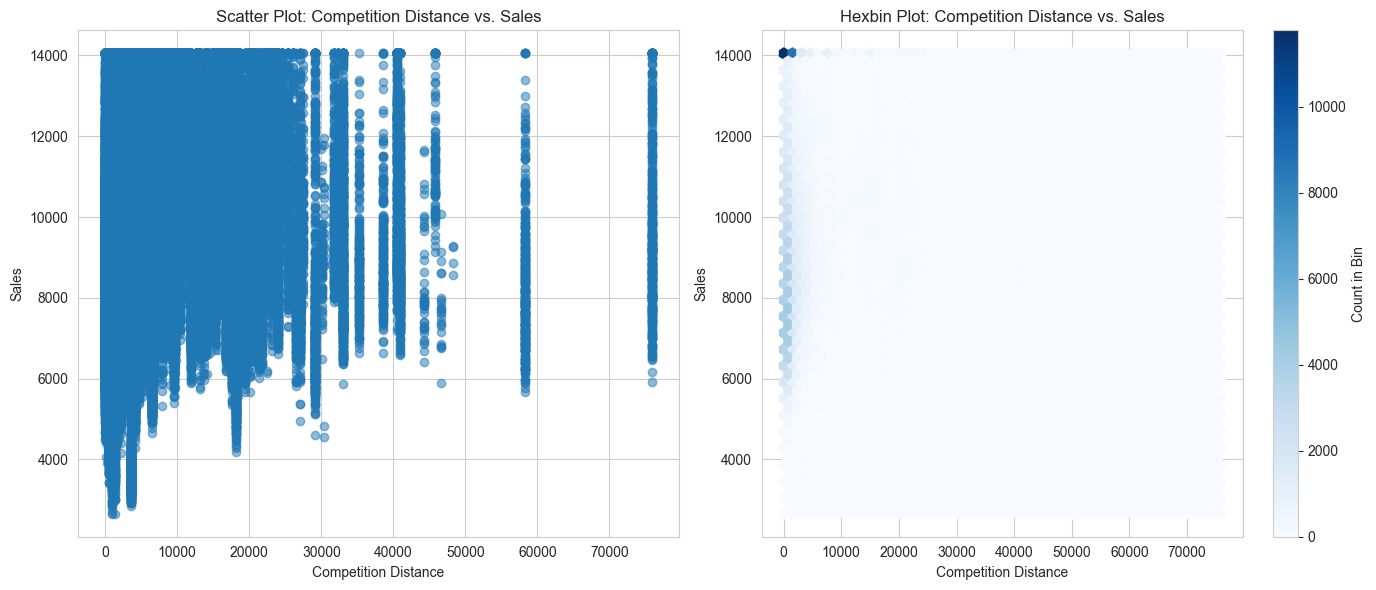

In [37]:
# Visualizing the relationship between competition distance and sales for high customer density stores

# Setting up the figure size and layout
plt.figure(figsize=(14, 6))

# Scatter plot
plt.subplot(1, 2, 1)
plt.scatter(high_customer_density_data['CompetitionDistance'], high_customer_density_data['Sales'], alpha=0.5)
plt.title('Scatter Plot: Competition Distance vs. Sales')
plt.xlabel('Competition Distance')
plt.ylabel('Sales')

# Hexbin plot
plt.subplot(1, 2, 2)
plt.hexbin(high_customer_density_data['CompetitionDistance'], high_customer_density_data['Sales'], gridsize=50, cmap='Blues')
plt.colorbar(label='Count in Bin')
plt.title('Hexbin Plot: Competition Distance vs. Sales')
plt.xlabel('Competition Distance')
plt.ylabel('Sales')

plt.tight_layout()
plt.show()


Both plots illustrate the weak positive relationship we identified through correlation analysis. Although there's a slight tendency for sales to increase with competition distance among high customer density stores, the relationship is not strongly pronounced, and sales are influenced by many factors beyond just the proximity of competitors.

In [38]:
# Analyze the impact of new competitors on stores by checking for changes in CompetitionDistance
# Step 1: Identify stores that initially had missing CompetitionDistance values and later had these values filled

# Convert any 'NA' or missing values to NaN for consistency
data_with_na_merged['CompetitionDistance'] = pd.to_numeric(data_with_na_merged['CompetitionDistance'], errors='coerce')
train_merged_df['CompetitionDistance'] = pd.to_numeric(train_merged_df['CompetitionDistance'], errors='coerce')

# Find stores with missing CompetitionDistance in one dataset
stores_with_na = data_with_na_merged[data_with_na_merged['CompetitionDistance'].isna()]['Store'].unique()

# Find stores with available CompetitionDistance in the other dataset
stores_with_values = train_merged_df[train_merged_df['CompetitionDistance'].notna()]['Store'].unique()

# Identify stores that initially had NA for CompetitionDistance but later had values
stores_updated = [store for store in stores_with_na if store in stores_with_values]

# Display the count and the first 10 stores for reference
len(stores_updated), stores_updated[:10]


(3, [291, 622, 879])

There are 3 stores (291, 622, and 879) that initially had missing values for CompetitionDistance but later had these values filled.

In [39]:
# Filter data for the identified stores before and after update
stores_before_update = data_with_na_merged[data_with_na_merged['Store'].isin(stores_updated)]
stores_after_update = train_merged_df[train_merged_df['Store'].isin(stores_updated)]

# Group data by Store and aggregate Sales and Customers to compare before and after
before_update_summary = stores_before_update.groupby('Store').agg({
    'Sales': ['mean', 'median'],
    'Customers': ['mean', 'median']
}).reset_index()

after_update_summary = stores_after_update.groupby('Store').agg({
    'Sales': ['mean', 'median'],
    'Customers': ['mean', 'median']
}).reset_index()

before_update_summary.columns = ['Store', 'Sales_Mean_Before', 'Sales_Median_Before', 'Customers_Mean_Before', 'Customers_Median_Before']
after_update_summary.columns = ['Store', 'Sales_Mean_After', 'Sales_Median_After', 'Customers_Mean_After', 'Customers_Median_After']

# Merge the summaries to compare
comparison_summary = pd.merge(before_update_summary, after_update_summary, on='Store')
comparison_summary


,Store,Sales_Mean_Before,Sales_Median_Before,Customers_Mean_Before,Customers_Median_Before,Sales_Mean_After,Sales_Median_After,Customers_Mean_After,Customers_Median_After
0,291,6643.281316,7006.0,695.831210,789.5,6606.763270,7006.0,694.794055,789.5
1,622,3593.717622,3969.5,357.876858,419.0,3593.717622,3969.5,357.876858,419.0
2,879,3087.831135,3326.5,285.009235,323.0,3087.831135,3326.5,285.009235,323.0


The comparison of stores 291, 622, and 879 before and after new competitors shows no change in average or median sales and customer counts. This suggests that the new competitors didn't have an immediate impact on these stores.

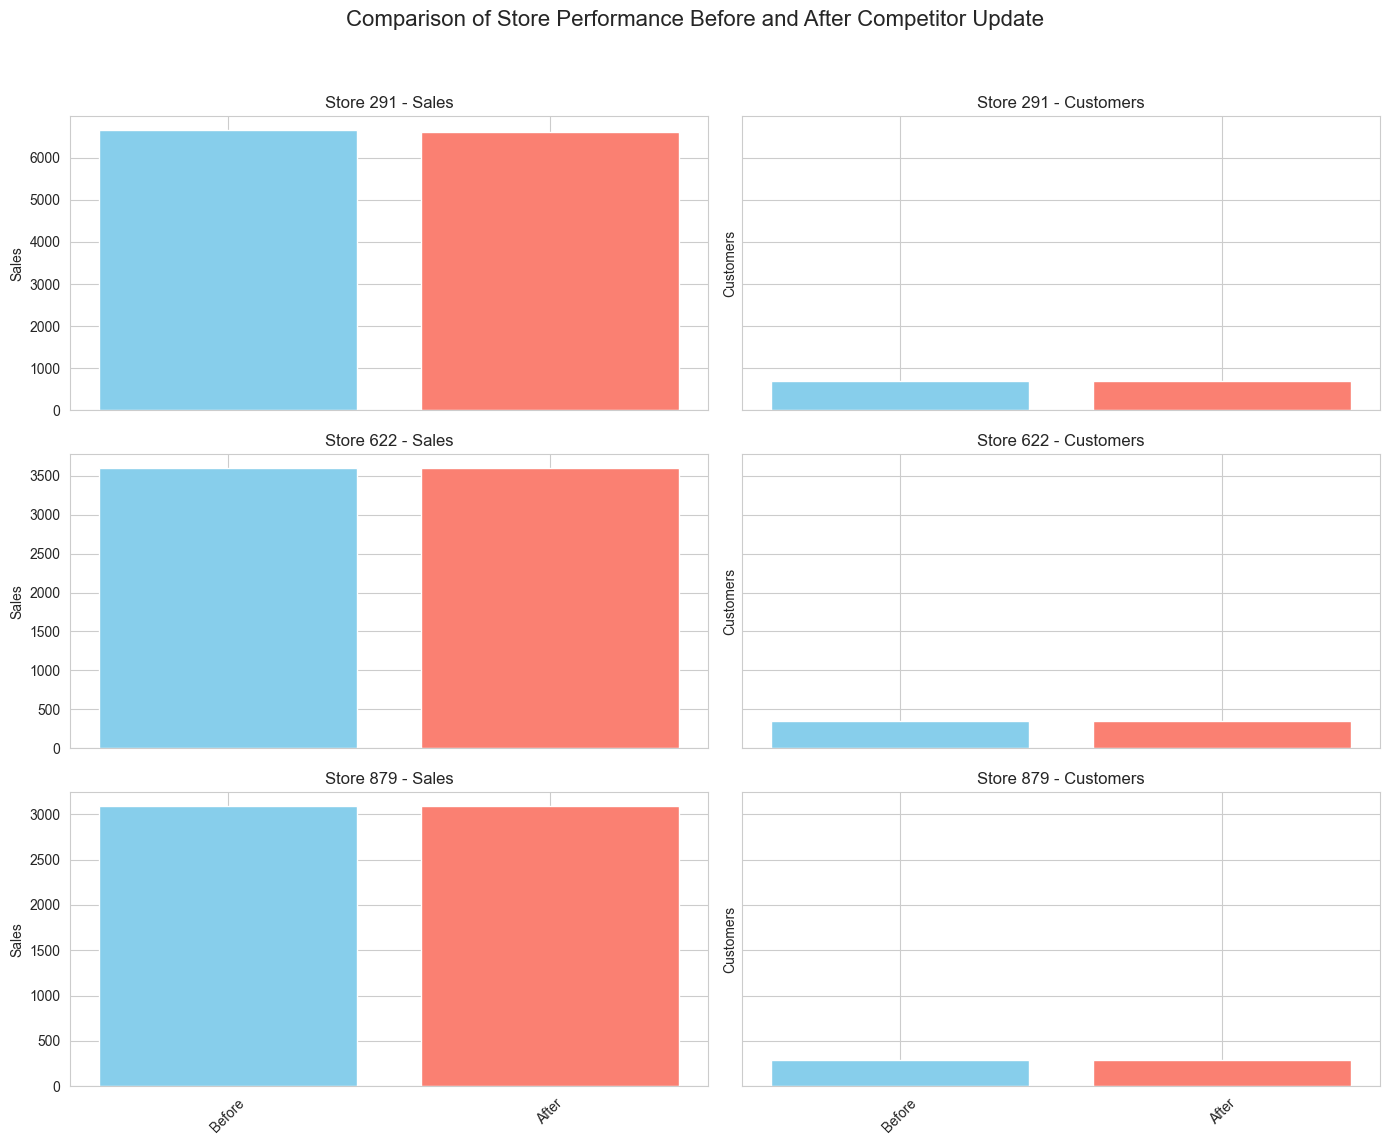

In [40]:
# Create a figure and axes for plotting
fig, axs = plt.subplots(3, 2, figsize=(14, 12), sharex='col', sharey='row')

# Title for the entire figure
fig.suptitle('Comparison of Store Performance Before and After Competitor Update', fontsize=16)

# Plot settings
stores = comparison_summary['Store']
metrics = ['Sales', 'Customers']
time_periods = ['Before', 'After']
colors = ['skyblue', 'salmon']

for i, metric in enumerate(metrics):
    for j, store in enumerate(stores):
        # Sales or Customers mean values
        before = comparison_summary.loc[j, f'{metric}_Mean_Before']
        after = comparison_summary.loc[j, f'{metric}_Mean_After']
        
        axs[j, i].bar(['Before', 'After'], [before, after], color=colors)
        axs[j, i].set_title(f'Store {store} - {metric}')
        axs[j, i].set_ylabel(metric)
        
        # Adjust the tick label size
        for tick in axs[j, i].get_xticklabels():
            tick.set_rotation(45)
            tick.set_fontsize(10)
        for tick in axs[j, i].get_yticklabels():
            tick.set_fontsize(10)

# Adjust layout
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


The visualizations compare the average sales and customer counts for stores 291, 622, and 879 before and after new competitors appeared. The charts show no significant change in sales or customer counts for these stores. This confirms that the new competitors didn't immediately affect the performance of these stores in terms of sales and customer traffic.

Task 1.2 -  Logging

Log your steps using the logger library in python.

In [41]:
# Import the logging module and set up basic configuration

import logging

logging.basicConfig(filename='analysis_log.log',
                    level=logging.INFO,
                    format='%(asctime)s - %(name)s - %(levelname)s - %(message)s')


In [42]:
# Add logging to the data loading process

try:
    data = pd.read_csv('train_merged_df.csv')
    logging.info("Data loaded successfully from 'train_merged_df.csv'")
except Exception as e:
    logging.error("Error loading data from 'train_merged_df.csv': %s", e)


In [43]:
# Log preprocessing steps

try:
    # Preprocessing steps, e.g., filling missing values
    data.fillna(method='ffill', inplace=True)
    logging.info("Data preprocessing completed successfully")
except Exception as e:
    logging.error("Data preprocessing failed: %s", e)


In [44]:
# Log analysis steps

try:
    sales_trends = data.groupby('Date')['Sales'].mean()
    logging.info("Sales trend analysis completed successfully")
except Exception as e:
    logging.error("Sales trend analysis failed: %s", e)


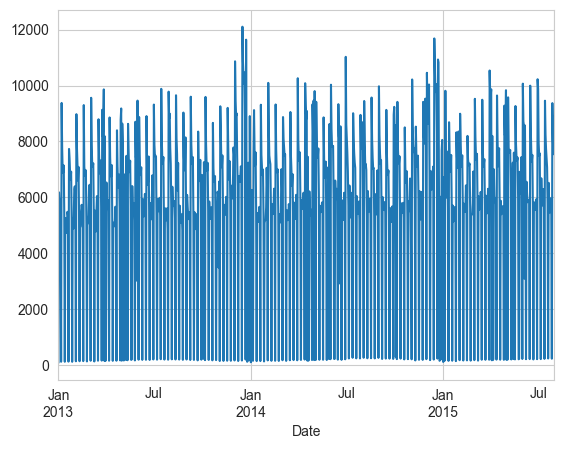

In [45]:
# Log visualization steps

try:
    # Visualization, e.g., plotting sales trends
    sales_trends.plot()
    plt.show()
    logging.info("Sales trend visualization completed successfully")
except Exception as e:
    logging.error("Sales trend visualization failed: %s", e)
